# IoU函數 (pytorch和numpy示範)
<font size=4>
IoU (intersection over union)也稱為Jaccard index。 <br>
    
IoU計算方式非常簡單，白話說就是兩個物件的重疊(overlap)/交集比例，從下公式和下圖可以明顯得知。<br>
IOU就是「兩個物件的交集」除上「兩個物件的聯集」。<br>
    
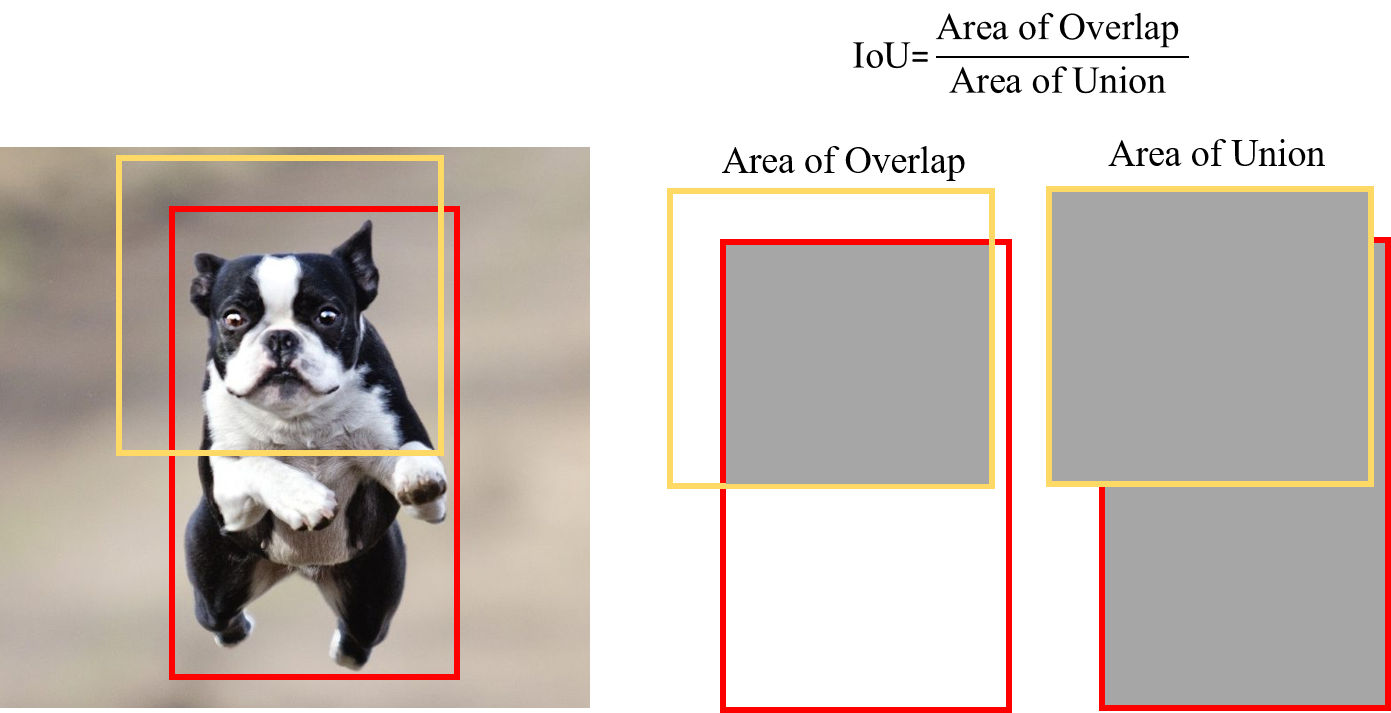



我們用手刻的方式寫IoU函數，這個IoU函數是網路上找的，我們用來跑看看

In [1]:
import torch
def bbox_iou(box1, box2, x1y1x2y2=True):
    '''
    因為BOX有可能是
    (1) 物件中心和長寬(x,y,w,h)的格式
    (2) 物件是左上和右下(x_min, y_min, x_max, y_max)的座標格式
    所以帶了一個參數x1y1x2y2， x1y1x2y2=True代表輸入的box1和box2格式是(2)
    box1 和 box2 的 shape 要不然就相同, 要不然其中一个為[1,4]
    
    # return box1 和 box2 的 Intersection over Union (IoU)
    '''  
    if not x1y1x2y2:
        # 取得box1 和 box2 的左上角和右下角座標
        b1_x1, b1_x2 = box1[:, 0] - box1[:, 2] / 2, box1[:, 0] + box1[:, 2] / 2
        b1_y1, b1_y2 = box1[:, 1] - box1[:, 3] / 2, box1[:, 1] + box1[:, 3] / 2
        b2_x1, b2_x2 = box2[:, 0] - box2[:, 2] / 2, box2[:, 0] + box2[:, 2] / 2
        b2_y1, b2_y2 = box2[:, 1] - box2[:, 3] / 2, box2[:, 1] + box2[:, 3] / 2
    else:
        # 取得 box1 和 box2 的左上角和右下角座標
        b1_x1, b1_y1, b1_x2, b1_y2 = box1[:, 0], box1[:, 1], box1[:, 2], box1[:, 3]
        b2_x1, b2_y1, b2_x2, b2_y2 = box2[:, 0], box2[:, 1], box2[:, 2], box2[:, 3]
    
    
    # 取得相交矩形的左上角和右下角坐标
    inter_rect_x1 = torch.max(b1_x1, b2_x1)
    inter_rect_y1 = torch.max(b1_y1, b2_y1)
    inter_rect_x2 = torch.min(b1_x2, b2_x2)
    inter_rect_y2 = torch.min(b1_y2, b2_y2)
    # area of overlap
    inter_area = torch.clamp(inter_rect_x2 - inter_rect_x1, min=0) * torch.clamp(
        inter_rect_y2 - inter_rect_y1 , min=0
    )
    
    # 分別計算 box1 area 和box2 area.
    b1_area = (b1_x2 - b1_x1 ) * (b1_y2 - b1_y1 )
    b2_area = (b2_x2 - b2_x1 ) * (b2_y2 - b2_y1 )
    # IoU    
    iou = inter_area / (b1_area + b2_area - inter_area + 1e-16)
    
    return iou


<font size=3>
    
**Example 1**

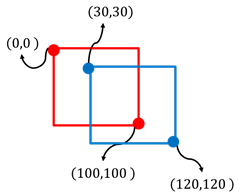


    
**Area of overlap**:左上座標是(30,30)右下座標是(100,100) <br>
    
$$
AreaOverlap = (100-30) \times (100-30) = 4900  
$$
    
**Area of Union**: 紅色的框面積 $+$ 藍色的框面積 $-$ Area of overlap <br>
    
$$
AreaUnion =  ((100-0) \times (100-0)) + ((120-30) \times (120-30)) - AreaOverlap = 13200
$$
    
**IoU**:
    
$$
IoU = \frac{AreaOverlap}{AreaUnion}= \frac{4900}{13200}=0.3712
$$

</font>



In [2]:
box1 = torch.tensor([[0,0,100,100]])
box2 = torch.tensor([[30,30,120,120]])
iou = bbox_iou(box1, box2, x1y1x2y2=True)
print('IoU:{:.4f}, for box1=[0,0,100,100], and box2 = [30,30,120,120]'.format(iou.numpy()[0]))

IoU:0.3712, for box1=[0,0,100,100], and box2 = [30,30,120,120]


<font size=3>
    
**Example 2**

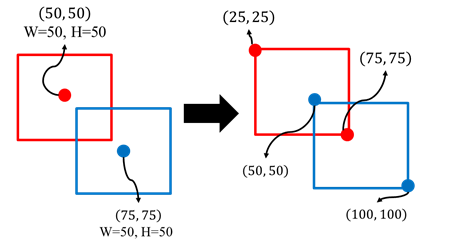
    
紅色框的中心座標為(50,50)，長寬為(50,50)<br>
藍色框的中心座標為(75,75)，長寬為(50,50)<br>
要先轉換成左上和右下的座標在計算IoU比較方便。

**Area of overlap**:左上座標是(50,50)右下座標是(75,75) <br>
    
$$
AreaOverlap = (75-50) \times (75-50) = 625  
$$
    
**Area of Union**: 紅色的框面積 $+$ 藍色的框面積 $-$ Area of overlap <br>
    
$$
AreaUnion =  ((75-25) \times (75-25)) + ((100-50) \times (100-50)) - AreaOverlap = 4375
$$
    
**IoU**:
    
$$
IoU = \frac{AreaOverlap}{AreaUnion}= \frac{625}{4375}=0.1429
$$

</font>

In [3]:
box1 = torch.tensor([[50,50,50,50]])
box2 = torch.tensor([[75,75,50,50]])
iou = bbox_iou(box1, box2, x1y1x2y2=False)
print('IoU:{:.4f}, for box1(x,y,w,h)=[50,50,50,50], and  box2(x,y,w,h)=[75,75,50,50]'.format(iou.numpy()[0]))

IoU:0.1429, for box1(x,y,w,h)=[50,50,50,50], and  box2(x,y,w,h)=[75,75,50,50]


<font size=3>
    
**Example 3: 多個box1 對上 一個box2**


In [4]:
box1 = torch.tensor([[50,50,50,50],[75,75,50,50]])
box2 = torch.tensor([[75,75,50,50]])
iou = bbox_iou(box1, box2, x1y1x2y2=False)
print('IoU:{}'.format(iou))

IoU:tensor([0.1429, 1.0000])


<font size=3>
    
**Example 4: 多個box1 對上 多個box2**


In [5]:
box1 = torch.tensor([[50,50,50,50],[75,75,50,50],[60,60,60,60]])
box2 = torch.tensor([[75,75,50,50],[50,50,50,50]])
iou = bbox_iou(box1, box2, x1y1x2y2=False)
print('IoU:{}'.format(iou))

RuntimeError: The size of tensor a (3) must match the size of tensor b (2) at non-singleton dimension 0

In [6]:
import numpy as np
def IoU(set1_box, set2_box):
    '''
    find the IoU (Jaccard overlap) of every box bination between two sets of boxes
    set1_box: n1_box * 4, (x_min,y_min, x_max, y_max)
    set2_box: n2_box * 4, (x_min,y_min, x_max, y_max)
    '''
    def find_intersection(set1_box, set2_box):
        a1 = np.expand_dims(set1_box[:,:2],axis=1) # (n1_box,1, 2)
        a2 = np.expand_dims(set2_box[:,:2],axis=0) # (1, n2_box, 2)
        lower_bounds = np.maximum(a1,a2)  # (n1_box, n2_box,2) # broadcastable caalculation
        a1 = np.expand_dims(set1_box[:,2:],axis=1) # (n1_box,1, 2)
        a2 = np.expand_dims(set2_box[:,2:],axis=0) # (1, n2_box, 2)
        upper_bounds = np.minimum(a1,a2)  # (n1_box, n2_box, 2) # broadcastable caalculation
        intersection_dims = np.clip(upper_bounds-lower_bounds, a_min=0, a_max=None) # (n1_box, n2_box, 2) 
        return intersection_dims[:,:,0]*intersection_dims[:,:,1] # (n1_box, n2_box)
    # 1. Find intersection
    intersection = find_intersection(set1_box, set2_box) # (n1_box, n2_box)
    # Find areas of each box in both sets
    area_set1 = (set1_box[:,2]-set1_box[:,0]) * (set1_box[:,3]-set1_box[:,1]) # (n1_box)
    area_set2 = (set2_box[:,2]-set2_box[:,0]) * (set2_box[:,3]-set2_box[:,1]) # (n2_box)
    # Find the union
    union =  np.expand_dims(area_set1,axis=1)+np.expand_dims(area_set2,axis=0)-intersection
    return intersection/union # (n1_box, n2_box)
    

<font size=3>
所以上面寫的函數不能做到多框對多框的IoU計算<br>
    
**我們用numpy函數寫一個可以多框對多框的IoU計算**<br>

因為Numpy和torch的計算超級像的，有興趣的人可以試著自己寫成torch的方式。<br>
差別大概是torch是用unsqueezed擴張維度，numpy是用expand_dims。<br>

In [7]:
box1 = np.array([
                 [0,0,100,100],
                 [10,10,1000,1000]
                ])
box2 = np.array([
                 [30,30,120,120],
                 [200,200,300,300],
                 [0,0,300,300]
                ])

for box_1 in box1:
    for box_2 in box2:
        iou = bbox_iou( torch.tensor([box_1]), torch.tensor([box_2]))
        print('IoU:{}, \t box1:{},\t box2{}'.format(iou, box_1, box_2)) 

IoU:tensor([0.3712]), 	 box1:[  0   0 100 100],	 box2[ 30  30 120 120]
IoU:tensor([0.]), 	 box1:[  0   0 100 100],	 box2[200 200 300 300]
IoU:tensor([0.1111]), 	 box1:[  0   0 100 100],	 box2[  0   0 300 300]
IoU:tensor([0.0083]), 	 box1:[  10   10 1000 1000],	 box2[ 30  30 120 120]
IoU:tensor([0.0102]), 	 box1:[  10   10 1000 1000],	 box2[200 200 300 300]
IoU:tensor([0.0853]), 	 box1:[  10   10 1000 1000],	 box2[  0   0 300 300]


In [8]:
iou = IoU(box1, box2)
print('IoU:{}'.format(iou))

IoU:[[0.37121212 0.         0.11111111]
 [0.00826446 0.01020304 0.08529412]]


<font size=4>
所以採用我們第二種方式用Numpy的寫法就可以避掉跑迴圈的麻煩